<a href="https://colab.research.google.com/github/Rafaelfyh/MiniProjetoDNC/blob/main/Projeto_DBC_Slot4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar todas as bibliotecas que poderão ser usadas no projeto. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import scipy.stats as stats

# Importar arquivo Walmart.csv com os dados para tratamento.

Criar um datafrma a partir do arquivo .csv com o comando pd.read_csv

In [8]:
df = pd.read_csv(r'/content/Walmart.csv')

#Checar os dados e ver a estrutura do Dataframe.


O comando df.shape retorna o valor (6435, 8), que são 6.435 linhas e 8 colunas.

O comando df.head() retorna a esturtura do dataframe, todas as colunas e as cinco primeiras linhas.



In [9]:
df.shape

(6435, 8)

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Renomear as colunas

Para melhor análise, foram renomeadas as colunas para Portugês. 

O comando df.raname permite fazer essa alteração.

In [11]:
df.rename(columns = {
    'Store':'Loja',
    'Date':'Data',	
    'Weekly_Sales':'Vendas_na_Semana',	
    'Holiday_Flag':'Semana_com_Feriado',	
    'Temperature':'Temperatura',
    'Fuel_Price':'Preco_Combustivel',
    'Unemployment':'Desemprego'
    }, inplace = True)
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Checagem dos dados
Nessa etapa, foram analisados os campos do dataframe, a fim de entender seus tipos, propriamente ditos. 
Por exemplo, foi observado que a Data está sendo tratada, orinalmente como Objeto. 

In [12]:
df.dtypes

Loja                    int64
Data                   object
Vendas_na_Semana      float64
Semana_com_Feriado      int64
Temperatura           float64
Preco_Combustivel     float64
CPI                   float64
Desemprego            float64
dtype: object

# Converter os dados de data para datetime
Para converter todos os dados da coluna Data para datetime, foi utilizada biblioteca Pandas, com a função pd.to_datetime. 

In [13]:
df ['Data'] = pd.to_datetime(df['Data'])
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Nova checagem dos dados para confirmação visual de que os dados da coluna Data foram realmente convertidos para datetime.

In [14]:
df.dtypes

Loja                           int64
Data                  datetime64[ns]
Vendas_na_Semana             float64
Semana_com_Feriado             int64
Temperatura                  float64
Preco_Combustivel            float64
CPI                          float64
Desemprego                   float64
dtype: object

# Verificar se existe valor nulo
Abaixo, foi analisado o datafrma afim de observar se existe algum valor nulo e que exige preenchimento. 
O comando df.isna() mostra como "True" os valores nulos. 
Para simplificar e mostrar apenas a quantidade de nulos em cada coluna, foi acrescentado .sum(). 
O resultado abaixo mostra que não existem valores nulos no dataframe. 

In [15]:
df.isna().sum()

Loja                  0
Data                  0
Vendas_na_Semana      0
Semana_com_Feriado    0
Temperatura           0
Preco_Combustivel     0
CPI                   0
Desemprego            0
dtype: int64

# Converter os dados da coluna Temperadura de Fahrenheit para Celsius
Como os dados estão sendo trastados no Brasil e a lingua escolhida foi o Portugês, faz sentido que os dados de temperatura sejam convertidos em Celsius. 

Para fazer essa conversão, foi utilizada uma função nomeada de fahr_para_celsius, contendo a fórmula necessária para a conversão. 

In [16]:
def fahr_para_celsius(temp_fahr):
    '''Converter Fahrenheit em Celsius
    
    Retorna o valor convertido em Celsius'''
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

Abaixo, todos os dados da coluna "Temperatura" foram atualizados para valores em Celsius, utilizando a função fahr_para_celsius.

In [17]:
df ['Temperatura'] = fahr_para_celsius(df['Temperatura'])
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.272222,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.483333,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.594444,3.969,192.330854,8.667


# Arredondar os valores para duas casas decimais
Para facilitar a leitura e tratamento das informações, os dados da coluna Temperatura foram arredondados para duas casas decimais. 

O comando df.round permite fazer esse arredamento para quantas casas decimais forem inforadas nos parâmentros.

In [18]:
df = df.round({'Temperatura':2})
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.59,3.969,192.330854,8.667


#Media de todas as vendas, de todas as lojas em todo o período do dataframe
1. Selecionar apenas a coluna "Vendas_na_Semana" para fazer o cálculo.
2. Executar o comando np.mean para calcular o valor.
3. Definir se quer fazer a media por linha ou por coluna. O parâemtro axis permite fazer essa definição. Axis = 0 busca a coluna. Axis = 1 busca a linha. 
4. Listar o resultado com duas casas decimais.

In [19]:
media_semana = df[['Vendas_na_Semana']]
media = np.mean(media_semana, axis=0)
media.round(2)

Vendas_na_Semana    1046964.88
dtype: float64

# Ordenar as vendas semanais por loja

O comando df.groupby('coluna ordenada') permite esse tratamento.

In [21]:
df.groupby('Loja')
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.59,3.969,192.330854,8.667


# Media de vendas por loja

Nos códigos abaixo, foi calculada a média de vendas por loja, renomeada a coluna vendas_na_Semana por Media_Vendas e ordenado o dataframe por loja com mais vendas de forma decrescente. 


Para calcular a media de vendas por loja, foi usada a seguinte lógica:

1. Criar um dataframe chamado media_vendas_por_loja, agrupado pela coluna "Loja", considerando um index padrao (não usar a loja como index) e fazer a media da coluna "Vendas_na_Semana".   

media_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].mean()

2. Arredondar os valores para duas casas decimais.

media_vendas_por_loja = media_vendas_por_loja.round()


3. Ordenar com o comando df.sort pela coluna "Vendas_na_Semana", do maior para o menor.

media_vendas_por_loja = media_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)

4. Renomear a coluna "Vendas_na_Semana para "Media_Vendas

media_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Media_Vendas',
    }, inplace = True)
media_vendas_por_loja

In [22]:
# Calcular o preço medio de vendas por loja
media_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].mean()
media_vendas_por_loja = media_vendas_por_loja.round()
media_vendas_por_loja = media_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)

media_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Media_Vendas',
    }, inplace = True)
media_vendas_por_loja

,Loja,Media_Vendas
19,20,2107677.0
3,4,2094713.0
13,14,2020978.0
12,13,2003620.0
1,2,1925751.0
9,10,1899425.0
26,27,1775216.0
5,6,1564728.0
0,1,1555264.0
38,39,1450668.0


# Media de vendas por loja

Nos códigos abaixo, foi calculado total de vendas por loja, renomeada a coluna vendas_na_Semana por Total_Vendas e ordenado o dataframe por loja com mais vendas de forma decrescente. 


Para calcular o total de vendas por loja, foi usada a seguinte lógica:

1. Criar um dataframe chamado total_vendas_por_loja, agrupado pela coluna "Loja", considerando um index padrao (não usar a loja como index) e fazer a soma da coluna "Vendas_na_Semana".   

total_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].sum()

2. Arredondar os valores para duas casas decimais.

total_vendas_por_loja = total_vendas_por_loja.round()


3. Ordenar com o comando df.sort pela coluna "Vendas_na_Semana", do maior para o menor.

total_vendas_por_loja = total_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)

4. Renomear a coluna "Vendas_na_Semana para "Total_Vendas

total_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Total_Vendas',
    }, inplace = True)
total_vendas_por_loja

In [23]:
# Total de vendas por loja
total_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].sum()
total_vendas_por_loja = total_vendas_por_loja.round()
total_vendas_por_loja = total_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)


# Renoemar coluna para ficar de acordo com agrupamento
total_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Total_Vendas',
    }, inplace = True)
total_vendas_por_loja

,Loja,Total_Vendas
19,20,301397792.0
3,4,299543953.0
13,14,288999911.0
12,13,286517704.0
1,2,275382441.0
9,10,271617714.0
26,27,253855917.0
5,6,223756131.0
0,1,222402809.0
38,39,207445542.0


# Listar somente as 3 lojas com maior faturamento médio no periodo (média de todas as vendas por loja)

O comando df.head() permite definir a quantidade de dados a serem listados. 

In [24]:
# 3 lojas com maior faturamento medio no período
top3mean = media_vendas_por_loja.head(3)
top3mean

,Loja,Media_Vendas
19,20,2107677.0
3,4,2094713.0
13,14,2020978.0


# Listar somente as 3 lojas com maior faturamento total no periodo (soma de todas as vendas por loja)

O comando df.head() permite definir a quantidade de dados a serem listados. 

In [25]:
# 3 lojas com maior faturamento total no período
top3max = total_vendas_por_loja.head(3)
top3max

,Loja,Total_Vendas
19,20,301397792.0
3,4,299543953.0
13,14,288999911.0


# Criar a correlação dos dados
1. A função df.corr() faz a correção dos dados do dataframe.
1. Como a correção sempre mostra dados repetidos, foi criada uma máscara com a biblioteca Numpy, utilizando a função np.triu.


In [26]:
# Correção e máscara da correlação
correlacao = df.corr()
mask = np.triu(df.corr())

# Gráfico de correção

O gráfico de correção abaixo exibe apenas uma vez as correções dos dados, para facilitar sua leitura e entendimento. 

Com o gráfico de correção, é possível observar que as semanas com feriado influenciam positivamente nas vendas, o que pode justificar um aumento nas vendas nesses períodos. 

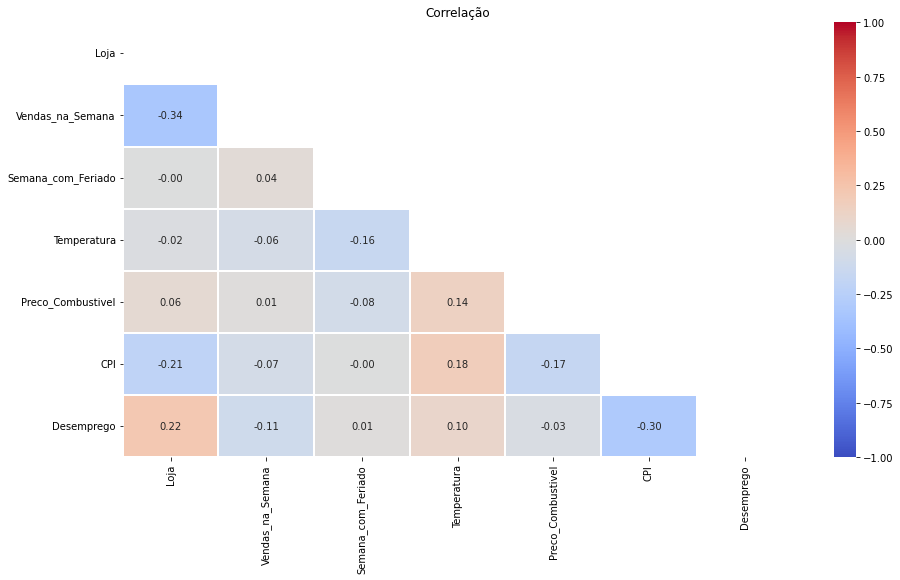

In [27]:
plt.figure(figsize = (15,8))
plt.title('Correlação')
plot = sn.heatmap(correlacao, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', fmt='.2f', linewidths=1.0, mask = mask)
plt.show()

# Correção resumida

Abaixo, a correção ignora as colunas Loja e Vendas_na_Semana, o que nos permnite observar uma maior influência do Desemprego, seguida pela Temperatura, CPI, Preço_Combustivel e Semana_com_Feriado. 

In [28]:
correlacao.corr()['Vendas_na_Semana'].abs().sort_values(ascending=False)[2:10]

Desemprego            0.307981
Temperatura           0.228884
CPI                   0.073790
Preco_Combustivel     0.058558
Semana_com_Feriado    0.027120
Name: Vendas_na_Semana, dtype: float64

# Criação do DF1
Apenas com as colunas Loja, Data, Vendas_na_Semana e Semana_com_Feriado

In [30]:
df1 = df[['Loja', 'Data', 'Vendas_na_Semana', 'Semana_com_Feriado']]
df1

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado
0,1,2010-05-02,1643690.90,0
1,1,2010-12-02,1641957.44,1
2,1,2010-02-19,1611968.17,0
3,1,2010-02-26,1409727.59,0
4,1,2010-05-03,1554806.68,0
...,...,...,...,...
6430,45,2012-09-28,713173.95,0
6431,45,2012-05-10,733455.07,0
6432,45,2012-12-10,734464.36,0
6433,45,2012-10-19,718125.53,0


# Lista de todas as semanas de vendas da loja 20

Após identificar que a loja 20 possui o maior número de vendas, foram filtradas todas as vendas apenas dessa loja e ordenadas por valor de venda semanal, do maior para menor. 

In [31]:
# Vendas por semana Loja 20
df1_loja20=df1['Loja']==20
loja20 = df1[df1_loja20]
loja20 = loja20.sort_values(by='Vendas_na_Semana',ascending=False)
loja20

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado
2763,20,2010-12-24,3766687.43,0
2815,20,2011-12-23,3555371.03,0
2811,20,2011-11-25,2906233.25,1
2762,20,2010-12-17,2819193.17,0
2759,20,2010-11-26,2811634.04,1
...,...,...,...,...
2764,20,2010-12-31,1799737.79,1
2750,20,2010-09-24,1789687.65,0
2767,20,2011-01-21,1781805.66,0
2768,20,2011-01-28,1761506.68,0


# Média de vendas por semana

Criado DF apenas com as datas e valores médios de vendas por semana, de todas as lojas.

In [32]:
media_vendas = df.groupby('Data',as_index=False)['Vendas_na_Semana'].mean()
media_vendas = media_vendas.round()
media_vendas = media_vendas.sort_values(by='Vendas_na_Semana',ascending=False)

media_vendas

,Data,Vendas_na_Semana
46,2010-12-24,1798476.0
98,2011-12-23,1711072.0
95,2011-11-25,1479858.0
41,2010-11-26,1462689.0
45,2010-12-17,1373796.0
...,...,...
50,2011-01-14,903860.0
51,2011-01-21,903437.0
47,2010-12-31,898500.0
103,2012-01-27,885222.0


# Comparação entre a media de vendas por semana geral vs media de vendas apenas da loja 20

Na comparação, a media de todas as lojas deixou a coluna "Loja" em branco, o que foi tratado com nome "Geral", para identificação de que essa é uma média geral da semana, de todas as lojas juntas.

1. Criado DF comparacao_geral_vs_loja_20, com os DFs Media_vendas e loja20 separadamente.

comparacao_geral_vs_loja_20  = [media_vendas, loja20]


2. Concatenado os DFs Media_vendas e loja20 separadamente para ficarem em uma mesma tabela. 

comparacao_geral_vs_loja_20  = pd.concat(comparacao_geral_vs_loja_20 )

3. Filtro de colunas para listar apenas DAta, Loja e Vendas_na_Semana. 

comparacao_geral_vs_loja_20  = comparacao_geral_vs_loja_20 [['Data', 'Loja', 'Vendas_na_Semana']]

4. Orenado por data, da mais recente para mais antiga.

comparacao_geral_vs_loja_20 = comparacao_geral_vs_loja_20.sort_values(by='Data',ascending=False)

5. Preenchido todos campos vazios (Nan) para "Geral". 

comparacao_geral_vs_loja_20.fillna('Geral', inplace = True)


In [33]:
comparacao_geral_vs_loja_20 = [media_vendas, loja20]
comparacao_geral_vs_loja_20 = pd.concat(comparacao_geral_vs_loja_20)
comparacao_geral_vs_loja_20 = comparacao_geral_vs_loja_20 [['Data', 'Loja', 'Vendas_na_Semana']]
comparacao_geral_vs_loja_20 = comparacao_geral_vs_loja_20.sort_values(by='Data',ascending=False)
comparacao_geral_vs_loja_20.fillna('Geral', inplace = True)
comparacao_geral_vs_loja_20 

,Data,Loja,Vendas_na_Semana
142,2012-12-10,Geral,1025078.00
2857,2012-12-10,20.0,2162951.36
141,2012-11-05,Geral,1042797.00
2835,2012-11-05,20.0,2168097.11
140,2012-10-26,Geral,1012091.00
...,...,...,...
2738,2010-02-07,20.0,2143676.77
2725,2010-02-04,20.0,2405395.22
1,2010-02-04,Geral,1120530.00
0,2010-01-10,Geral,938664.00


# Totais das vendas de todas as lojas

In [34]:
df.describe()
medias = df.describe().round(2)
medias = medias [['Vendas_na_Semana', 'Semana_com_Feriado']]
medias

,Vendas_na_Semana,Semana_com_Feriado
count,6435.00,6435.00
mean,1046964.88,0.07
std,564366.62,0.26
min,209986.25,0.00
25%,553350.10,0.00
50%,960746.04,0.00
75%,1420158.66,0.00
max,3818686.45,1.00


# Gráfico de barras com comparação entre média de vendas de todas as lojas vs média de vendas apenas da loja 20

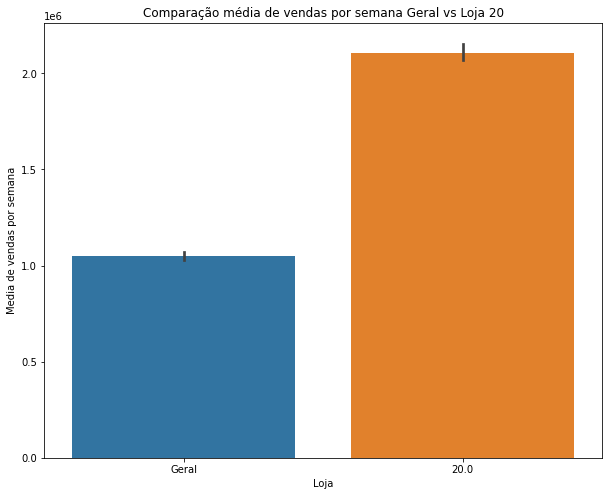

In [35]:
plt.figure(figsize = (10,8))
plt.title('Comparação média de vendas por semana Geral vs Loja 20')
sn.barplot(x = comparacao_geral_vs_loja_20['Loja'], y = comparacao_geral_vs_loja_20['Vendas_na_Semana'])
plt.xlabel ('Loja')
plt.ylabel ('Media de vendas por semana')
plt.show()

# Tentativa de juntar total, media e minimo de vendas por data

In [38]:
# Total de vendas por data
max_vendas_por_data = df.groupby('Data',as_index=False)['Vendas_na_Semana'].max()
max_vendas_por_data = max_vendas_por_data.round()
max_vendas_por_data = max_vendas_por_data.sort_values(by='Vendas_na_Semana',ascending=False)

# Total de vendas por data
min_vendas_por_data = df.groupby('Data',as_index=False)['Vendas_na_Semana'].min()
min_vendas_por_data = min_vendas_por_data.round()
min_vendas_por_data = min_vendas_por_data.sort_values(by='Vendas_na_Semana',ascending=False)

# Total de vendas por data
media_vendas_por_data = df.groupby('Data',as_index=False)['Vendas_na_Semana'].mean()
media_vendas_por_data = media_vendas_por_data.round()
media_vendas_por_data = media_vendas_por_data.sort_values(by='Vendas_na_Semana',ascending=False)


# Renoemar coluna para ficar de acordo com agrupamento
max_vendas_por_data.rename(columns = {
    'Vendas_na_Semana':'Max_Vendas',
    }, inplace = True)

# Renoemar coluna para ficar de acordo com agrupamento
min_vendas_por_data.rename(columns = {
    'Vendas_na_Semana':'Min_Vendas',
    }, inplace = True)

# Renoemar coluna para ficar de acordo com agrupamento
media_vendas_por_data.rename(columns = {
    'Vendas_na_Semana':'Media_Vendas',
    }, inplace = True)

max_vendas_por_data.reset_index(drop=True, inplace=True)
min_vendas_por_data.reset_index(drop=True, inplace=True)
media_vendas_por_data.reset_index(drop=True, inplace=True)


comparacao_por_data = [max_vendas_por_data, min_vendas_por_data, media_vendas_por_data]
comparacao_por_data = pd.concat(comparacao_por_data)
comparacao_por_data = comparacao_por_data [['Data', 'Max_Vendas', 'Min_Vendas', 'Media_Vendas']]
#comparacao_por_data = comparacao_por_data.groupby('Data',as_index=False)
comparacao_por_data = comparacao_por_data.sort_values(by='Data', ascending=False)



comparacao_por_data

,Data,Max_Vendas,Min_Vendas,Media_Vendas
73,2012-12-10,NaN,NaN,1025078.0
4,2012-12-10,NaN,291781.0,NaN
65,2012-12-10,2162951.0,NaN,NaN
3,2012-11-05,NaN,295842.0,NaN
62,2012-11-05,2168097.0,NaN,NaN
...,...,...,...,...
10,2010-02-04,NaN,NaN,1120530.0
30,2010-02-04,NaN,274635.0,NaN
133,2010-01-10,NaN,NaN,938664.0
136,2010-01-10,NaN,224294.0,NaN


In [47]:
sn.barplot(x = comparacao_por_data['Data'], y = comparacao_geral_vs_loja_20['Max_Vendas'])


KeyError: ignored

In [40]:
max_vendas_por_data, media_vendas_por_data

(          Data  Max_Vendas
 0   2010-12-24   3818686.0
 1   2011-12-23   3676389.0
 2   2011-11-25   3004702.0
 3   2010-11-26   2939946.0
 4   2010-12-17   2819193.0
 ..         ...         ...
 138 2011-01-14   1884345.0
 139 2010-09-24   1879891.0
 140 2011-07-01   1864746.0
 141 2011-01-28   1814241.0
 142 2010-12-31   1799738.0
 
 [143 rows x 2 columns],           Data  Media_Vendas
 0   2010-12-24     1798476.0
 1   2011-12-23     1711072.0
 2   2011-11-25     1479858.0
 3   2010-11-26     1462689.0
 4   2010-12-17     1373796.0
 ..         ...           ...
 138 2011-01-14      903860.0
 139 2011-01-21      903437.0
 140 2010-12-31      898500.0
 141 2012-01-27      885222.0
 142 2011-01-28      879997.0
 
 [143 rows x 2 columns])

In [41]:
comparacao_geral_vs_loja_20 = [media_vendas, loja20]
comparacao_geral_vs_loja_20 = pd.concat(comparacao_geral_vs_loja_20)
comparacao_geral_vs_loja_20 = comparacao_geral_vs_loja_20 [['Data', 'Loja', 'Vendas_na_Semana']]
comparacao_geral_vs_loja_20 = comparacao_geral_vs_loja_20.sort_values(by='Data',ascending=False)
comparacao_geral_vs_loja_20.fillna('Geral', inplace = True)
comparacao_geral_vs_loja_20 

,Data,Loja,Vendas_na_Semana
142,2012-12-10,Geral,1025078.00
2857,2012-12-10,20.0,2162951.36
141,2012-11-05,Geral,1042797.00
2835,2012-11-05,20.0,2168097.11
140,2012-10-26,Geral,1012091.00
...,...,...,...
2738,2010-02-07,20.0,2143676.77
2725,2010-02-04,20.0,2405395.22
1,2010-02-04,Geral,1120530.00
0,2010-01-10,Geral,938664.00


# Estou tentando trazer somente a comperação de semana a semana para saber se a loja 20 ficou abaixo da media em algum momento.   DAQUI PRA BAIXO É TESTE. NÃO CONSIDERAR.

Data	Loja	Vendas_na_Semana

142	2012-12-10	Geral	1025078.00

In [42]:
df20 = loja20[['Data', 'Vendas_na_Semana']]
df20

,Data,Vendas_na_Semana
2763,2010-12-24,3766687.43
2815,2011-12-23,3555371.03
2811,2011-11-25,2906233.25
2762,2010-12-17,2819193.17
2759,2010-11-26,2811634.04
...,...,...
2764,2010-12-31,1799737.79
2750,2010-09-24,1789687.65
2767,2011-01-21,1781805.66
2768,2011-01-28,1761506.68


In [43]:
teste = comparacao_geral_vs_loja_20.pivot(index='Data',columns='Loja',values='Vendas_na_Semana')
teste

Loja,20.0,Geral
Data,,
2010-01-10,1933719.21,938664.0
2010-02-04,2405395.22,1120530.0
2010-02-07,2143676.77,1087055.0
2010-02-19,2161549.76,1072822.0
2010-02-26,1898193.95,977079.0
...,...,...
2012-10-08,2144245.39,1053410.0
2012-10-19,1999363.49,1002720.0
2012-10-26,2031650.55,1012091.0


# Salvar dataframe em Excel. Após executar, precisa baixar no menu da esquerda (mesmo lugar onde importamos o CSV)

In [44]:
# writing to Excel
datatoexcel = pd.ExcelWriter('CarsData1.xlsx')
  
# write DataFrame to excel
comparacao_geral_vs_loja_20.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


In [48]:
comparacao_geral_vs_loja_20 
df10['nova coluna'] = df10['coluna base'].shift() - df10['coluna base'].shift(-1)
df10.loc[df10['nova coluna'] = -1
df10.loc[df10['nova coluna'] 'maior que 0', 'nova coluna'] = 1
df10.loc[df10['nova coluna'] == 0, 'nova coluna'] = 0
df10['nova coluna'].replace({-1:'de baixo é maior', 1:'de cima é maior', 0:'iguais'}, inplace=True)

SyntaxError: ignored